# Locate The Data Path

###Get the Google drive Path Location, with google sign in

In [1]:
# Google.colab drive integration
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# specify the desired data location to the current working directory
%cd /content/drive/MyDrive/Dataset

/content/drive/.shortcut-targets-by-id/1hQJhZXCBbc369GWFH06FCrflHQ8EO2xS/Dataset


In [3]:
# Keras prepocessing library
! pip install Keras-Preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.1 MB/s eta 0:00:00


In [4]:
# Get the required Library
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50V2, VGG16
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Input, MaxPool2D, BatchNormalization, Dropout, GlobalAveragePooling2D, Activation
from tensorflow.keras.models import Model
import pandas as pd
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import tensorflow as tf

#Splitting The Dataset

In [5]:
# Library to split datasets
! pip install split_folders

In [6]:
# Getting the Dataset's Folder path and the splitted Data's target location

import splitfolders # or import splitfolders
input_folder = "/content/drive/MyDrive/Dataset/DatasetV1/Art/NoDuplicates" # Change The path depending on your file

# where you want the split datasets saved. one will be created if it does not exist or none is set
output = "/content/drive/MyDrive/Dataset/DatasetV1/SplitData" # Change The path depending on your file

# ratio of split are in order of train/val/test. You can change to whatever you want. For train/val sets only, you could do .75, .25 for example.
splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, .2))

Copying files: 354 files [01:58,  3.00 files/s]


In [6]:
# Get the library required
from keras_preprocessing.image import ImageDataGenerator

# Training Data Path and Image gen (Normalization)
TRAINING_DIR = "/content/drive/MyDrive/Dataset/DatasetV1/SplitData/train" # Change The path depending on your file
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Validation Data Path and Image gen (Normalization)
VALIDATION_DIR = "/content/drive/MyDrive/Dataset/DatasetV1/SplitData/val" # Change The path depending on your file
validation_datagen = ImageDataGenerator(rescale = 1./255)

# Training gen and batching
train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size=32
)

# Validation gen and batching
validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size=32
)

Found 277 images belonging to 10 classes.
Found 74 images belonging to 10 classes.


#Checking the File's in the Directory

In [7]:
# Just making sure the library to import things from G Drive Is present
from google.colab import drive
import os # Library to manipulate OS  I.E Copying, changing, and or reading things on folders

directoryTrain = '/content/drive/MyDrive/Dataset/DatasetV1/SplitData/train/' # Change directory depending on your file's path
directoryVal = '/content/drive/MyDrive/Dataset/DatasetV1/SplitData/val/'

# List the contents of the directory
# Code to Check wether there is file's in the directory or not (Might be useful to debug)
try:
    files = os.listdir(directoryTrain)
    print("Files in directory:", files)
except FileNotFoundError:
    print(f"The directory {directoryTrain} does not exist.")

try:
    files = os.listdir(directoryVal)
    print("Files in directory:", files)
except FileNotFoundError:
    print(f"The directory {directoryVal} does not exist.")

Files in directory: ['Minimalism', 'Realism', 'Pop art', 'Fauvism', 'Romanticism', 'Symbolism', 'Dadaism', 'Surrealist', 'Cubism', 'Abstract']
Files in directory: ['Minimalism', 'Realism', 'Pop art', 'Fauvism', 'Romanticism', 'Symbolism', 'Dadaism', 'Surrealist', 'Cubism', 'Abstract']


#Check to see if the image is in JPEG Format

In [8]:
from PIL import Image
import os

def check_image_formats(directory):
    supported_formats = ['JPEG', 'PNG', 'GIF', 'BMP']
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    if img.format not in supported_formats:
                        print(f"Unsupported format: {file_path} ({img.format})")
            except (IOError, SyntaxError) as e:
                print(f"Cannot open file: {file_path} ({e})")

# Check the training data directory
train_directory = "/content/drive/MyDrive/Dataset/DatasetV1/SplitData/train"
check_image_formats(train_directory)

# Check the validation data directory
val_directory = "/content/drive/MyDrive/Dataset/DatasetV1/SplitData/val"
check_image_formats(val_directory)

# If the file's extension is not .JPG, Use this code

In [19]:
def check_and_convert_to_jpeg(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)

            try:
                with Image.open(file_path) as img:

                    # Check if the file is in WEBP format
                    if img.format == 'WEBP': # Set this to What extension you want to change to JPEG / JPG

                        # Convert to JPEG
                        new_file_path = os.path.splitext(file_path)[0] + '.jpg'
                        img = img.convert('RGB')  # Convert to RGB to ensure JPEG compatibility
                        img.save(new_file_path, 'JPEG')
                        print(f"Converted {file_path} to {new_file_path}")
                        os.remove(file_path)  # Remove the original WEBP file / the extension that you set

            except (IOError, SyntaxError) as e:
                print(f"Cannot open file: {file_path} ({e})")

# Check and convert files in the training data directory
train_directory = "/content/drive/MyDrive/Dataset/DatasetV1/SplitData/train"
check_and_convert_to_jpeg(train_directory)

# Check and convert files in the validation data directory
val_directory = "/content/drive/MyDrive/Dataset/DatasetV1/SplitData/val"
check_and_convert_to_jpeg(val_directory)

Converted /content/drive/MyDrive/Dataset/DatasetV1/SplitData/val/Pop art/obhoua8q.jpg to /content/drive/MyDrive/Dataset/DatasetV1/SplitData/val/Pop art/obhoua8q.jpg


#Load the Dataset Onto The Train and Val Variable

In [9]:
# Load training data
train_data = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/MyDrive/Dataset/DatasetV1/SplitData/train",
  image_size=(224, 224),
  batch_size=32,
  seed=123
)

# Load validation data
val_data = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/MyDrive/Dataset/DatasetV1/SplitData/val",
  image_size=(224, 224),
  batch_size=32,
  seed=123
)

Found 277 files belonging to 10 classes.
Found 74 files belonging to 10 classes.


#Model Attempt 1

In [21]:
#The Machine Learning Model
model1 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(16, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10)
])

In [22]:
#Compile The Model
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 111, 111, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 54, 54, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 64)       

In [24]:
#Fit The Data Onto the previously compiled Model
history = model1.fit(train_data,
          validation_data=val_data,
          epochs=10) #Change The Epoch (Training Attempt / Loop) Depending On your Judgement

Epoch 1/10
9/9 [==============================] - 27s 545ms/step - loss: 2.3295 - accuracy: 0.0939 - val_loss: 2.2926 - val_accuracy: 0.1081
Epoch 2/10
9/9 [==============================] - 5s 195ms/step - loss: 2.2817 - accuracy: 0.1264 - val_loss: 2.2729 - val_accuracy: 0.0811
Epoch 3/10
9/9 [==============================] - 6s 199ms/step - loss: 2.2245 - accuracy: 0.1552 - val_loss: 2.2580 - val_accuracy: 0.2162
Epoch 4/10
9/9 [==============================] - 4s 128ms/step - loss: 2.1062 - accuracy: 0.3105 - val_loss: 2.2116 - val_accuracy: 0.2568
Epoch 5/10
9/9 [==============================] - 4s 134ms/step - loss: 1.9281 - accuracy: 0.3682 - val_loss: 2.3329 - val_accuracy: 0.2162
Epoch 6/10
9/9 [==============================] - 6s 130ms/step - loss: 1.7312 - accuracy: 0.4152 - val_loss: 2.1922 - val_accuracy: 0.2432
Epoch 7/10
9/9 [==============================] - 4s 131ms/step - loss: 1.3722 - accuracy: 0.5668 - val_loss: 2.5452 - val_accuracy: 0.2838
Epoch 8/10
9/9 [===

###Check the graph for the model (Model1)

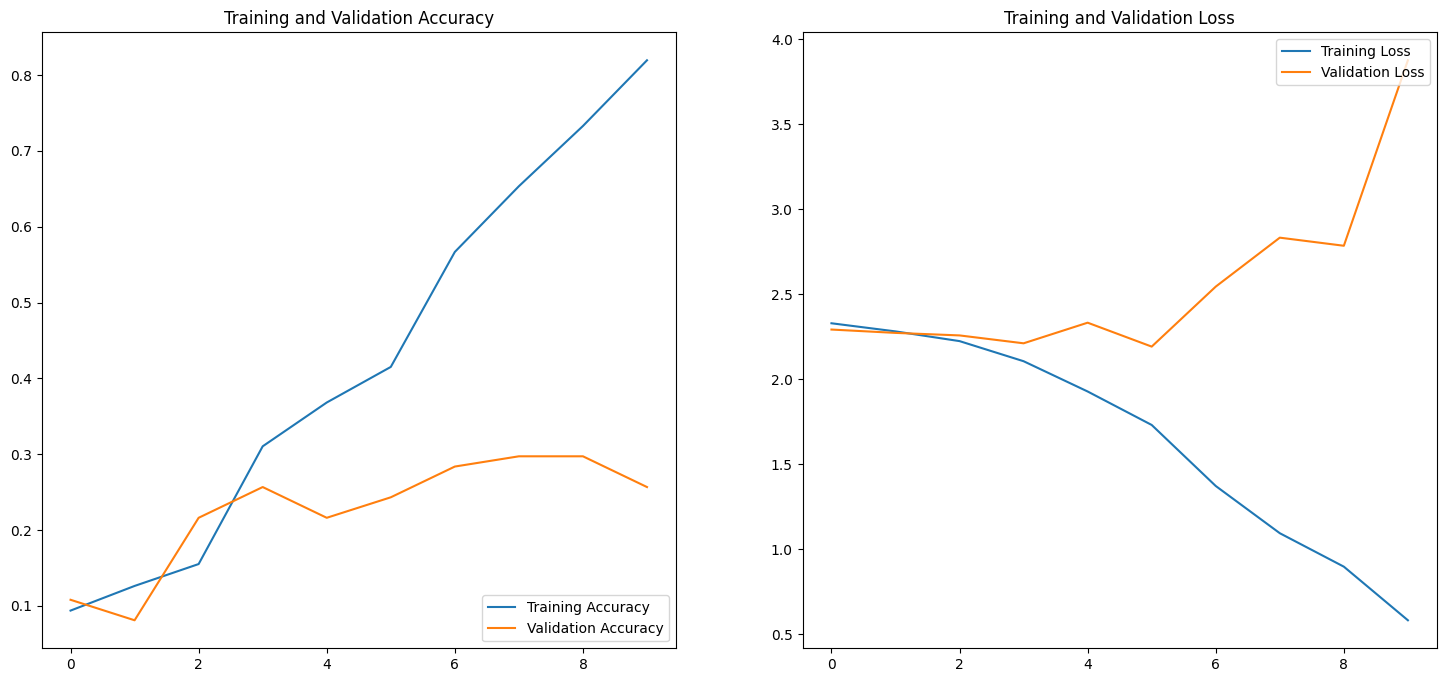

In [26]:
#This uses Matplotlib.pyplot to work
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = 10
epochs_range = range(epochs)

plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#Model Attempt 2

In [27]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(10, activation='softmax')
])

In [28]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                                           
                                                                 
 batch_normalization (Batch  (None, 112, 112, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_17 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 56, 56, 64)       

In [29]:
#Compile The Model
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
#Fit The Data Onto the previously compiled Model
history = model1.fit(train_data,
          validation_data=val_data,
          epochs=10) #Change The Epoch (Training Attempt / Loop) Depending On your Judgement

Epoch 1/10
9/9 [==============================] - 10s 211ms/step - loss: 0.6408 - accuracy: 0.7726 - val_loss: 2.9095 - val_accuracy: 0.3378
Epoch 2/10
9/9 [==============================] - 4s 131ms/step - loss: 0.3957 - accuracy: 0.9025 - val_loss: 4.0581 - val_accuracy: 0.2568
Epoch 3/10
9/9 [==============================] - 5s 188ms/step - loss: 0.2494 - accuracy: 0.9134 - val_loss: 4.4180 - val_accuracy: 0.2973
Epoch 4/10
9/9 [==============================] - 6s 196ms/step - loss: 0.1823 - accuracy: 0.9422 - val_loss: 4.7068 - val_accuracy: 0.2568
Epoch 5/10
9/9 [==============================] - 5s 196ms/step - loss: 0.1968 - accuracy: 0.9350 - val_loss: 4.7123 - val_accuracy: 0.3514
Epoch 6/10
9/9 [==============================] - 5s 199ms/step - loss: 0.1259 - accuracy: 0.9639 - val_loss: 5.2884 - val_accuracy: 0.2973
Epoch 7/10
9/9 [==============================] - 5s 195ms/step - loss: 0.0847 - accuracy: 0.9856 - val_loss: 4.6532 - val_accuracy: 0.2703
Epoch 8/10
9/9 [===

###Check the graph for the model (Model2)

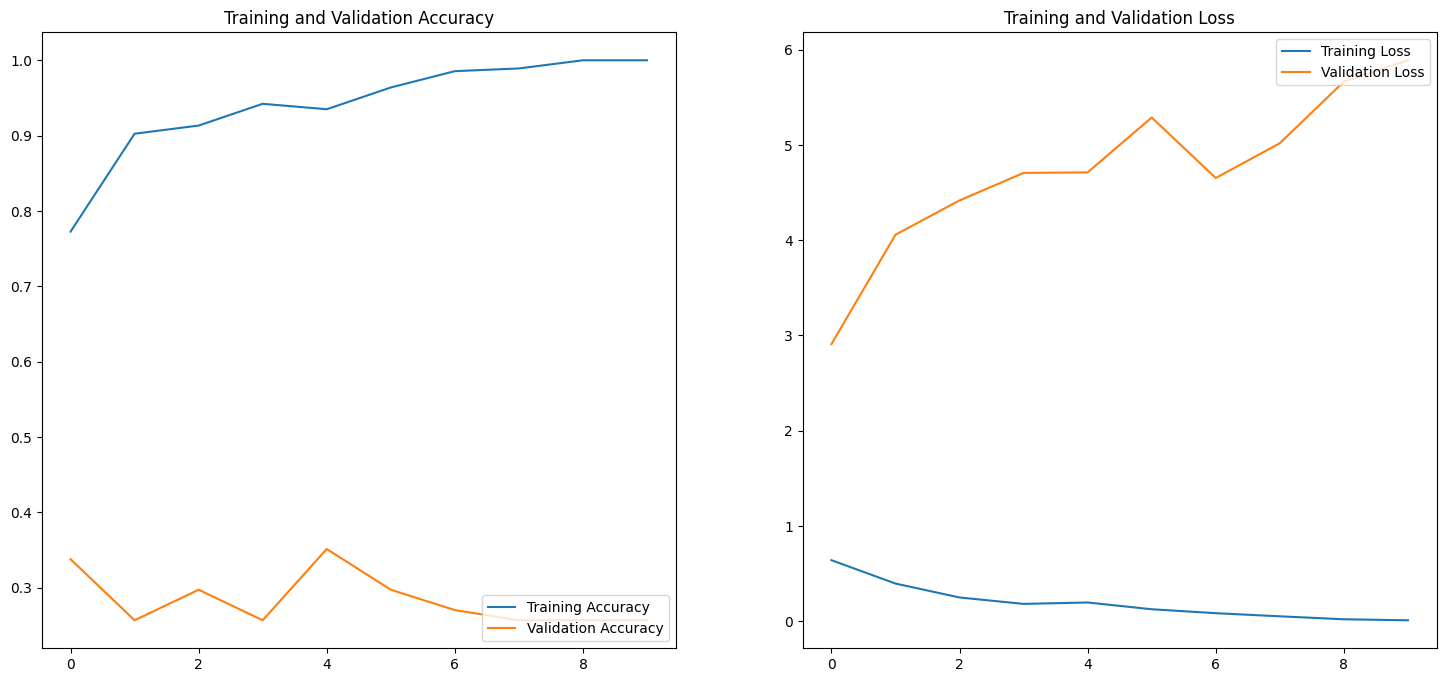

In [31]:
#This uses Matplotlib.pyplot to work
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = 10
epochs_range = range(epochs)

plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()